# Harris Corner Detection from Scratch

------

### Import Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from tqdm import tqdm

### Utility Functions

In [2]:
# the normal CV2 conversion doesnt seem to work as good
def rgb2gray(img) :
    return np.dot(img[..., :3], [0.2989, 0.5870, 0.1140])

# Detemine gradient function for Fx and Fy using sobel filter(normlized)
def gradient_x(img) :
    grad_img = ndimage.convolve(img, np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]]))
    return grad_img/np.max(grad_img)

def gradient_y(img) :
    grad_img = ndimage.convolve(img, np.array([[-1, -2, -1],[0, 0, 0],[1, 2, 1]]))
    return grad_img/np.max(grad_img)

### Find Filtered Grdients

In [3]:
ratio = 0.02 # (0.001, 0.01, 0.05)  lower the ratio the more points it will pick up
input_img = cv2.imread('triangle-shapes.jpg')
gray_input_img = rgb2gray(input_img)

# Apply gaussian blurring
blur_img = ndimage.gaussian_filter(gray_input_img, sigma = 1.0)

# Find gradient Ix and Iy
Ix = gradient_x(blur_img)
Iy = gradient_y(blur_img)

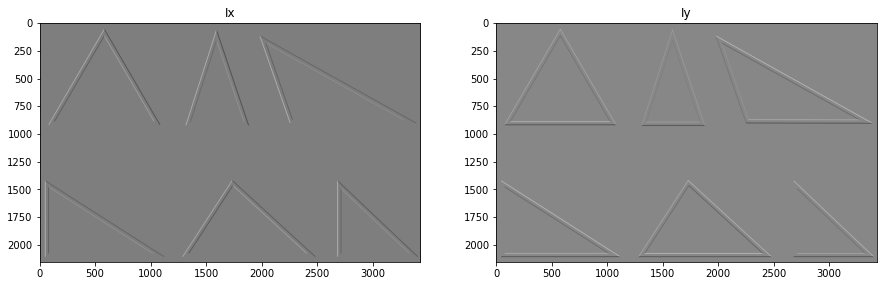

In [4]:
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.imshow(Ix, cmap='gray')
plt.title('Ix')

plt.subplot(1,2,2)
plt.imshow(Iy, cmap='gray')
plt.title('Iy')

plt.show()

### Find the Corners

In [5]:
Ixx = Ix * Ix
Iyy = Iy * Iy
Ixy = Ix * Iy

tuple_data = [] # Contains y, x Coords and its corner response
k = 0.04
MAX = 0
for i in tqdm(range(1, input_img.shape[0] - 1)):
    for j in range(1, input_img.shape[1] - 1):
        window_x = Ixx[i-4 : i+5 , j-4 : j+5]
        window_y = Iyy[i-4 : i+5 , j-4 : j+5]
        window_xy = Ixy[i-4 : i+5 , j-4 : j+5]
        
        sum_xx = np.sum(window_x)
        sum_yy = np.sum(window_y)
        sum_xy = np.sum(window_xy)
        
        determinant = (sum_xx * sum_yy) - (sum_xy * sum_xy)
        trace = sum_xx + sum_yy
        R = determinant - (k * trace * trace)
        tuple_data.append((i, j, R))
        
        MAX = max(MAX, R)
    
print("MAX value : ", MAX)

# L contains y,x coord( > threshold) and their corner response of those coords
L = []
thres_ratio = ratio
threshold = thres_ratio * MAX
for res in tuple_data :
    i, j, R = res
    if R > threshold :
        L.append([i, j, R])

100%|██████████| 2150/2150 [01:29<00:00, 23.91it/s]


MAX value :  259.69431736130844


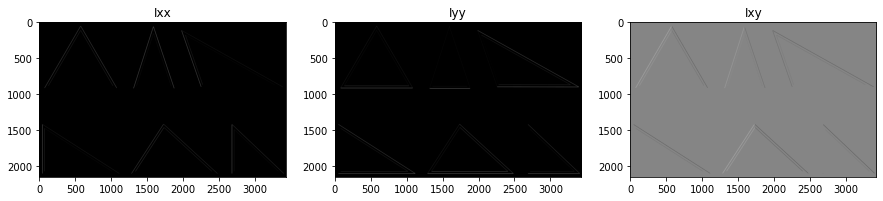

In [6]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
plt.imshow(Ixx, cmap='gray')
plt.title('Ixx')

plt.subplot(1,3,2)
plt.imshow(Iyy, cmap='gray')
plt.title('Iyy')

plt.subplot(1,3,3)
plt.imshow(Ixy, cmap='gray')
plt.title('Ixy')

plt.show()

### Non Maximal Suppression

In [7]:
sorted_L = sorted(L, key = lambda x: x[2], reverse = True)
final_L = []
final_L.append(sorted_L[0][:-1])

dis = 10
xc, yc = [], []
for i in sorted_L:
    for j in final_L:
        if(abs(i[0] - j[0] <= dis) and abs(i[1] - j[1]) <= dis) :
            break
    else:
        final_L.append(i[:-1])
        xc.append(i[1])
        yc.append(i[0])
        
print("Total points : ", len(sorted_L))
print("Critical points : ", len(final_L))

Total points :  2451
Critical points :  31


### Final Images

In [8]:
corner_img = np.zeros(input_img.shape)
for i in final_L :
    y, x = i[0], i[1]
    corner_img[y][x] = 1

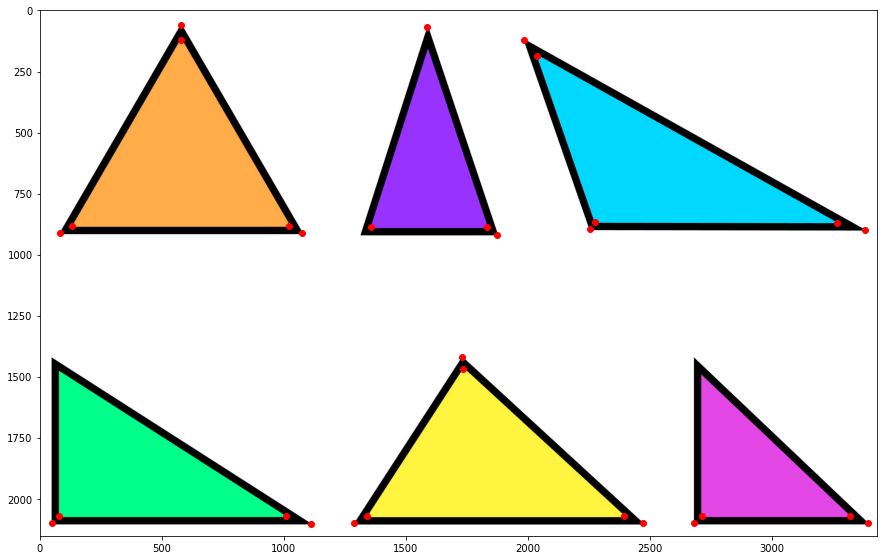

In [9]:
plt.figure(figsize=(15,15))
plt.imshow(input_img, cmap = 'gray')
plt.plot(xc, yc, 'o', color='red')
plt.show()

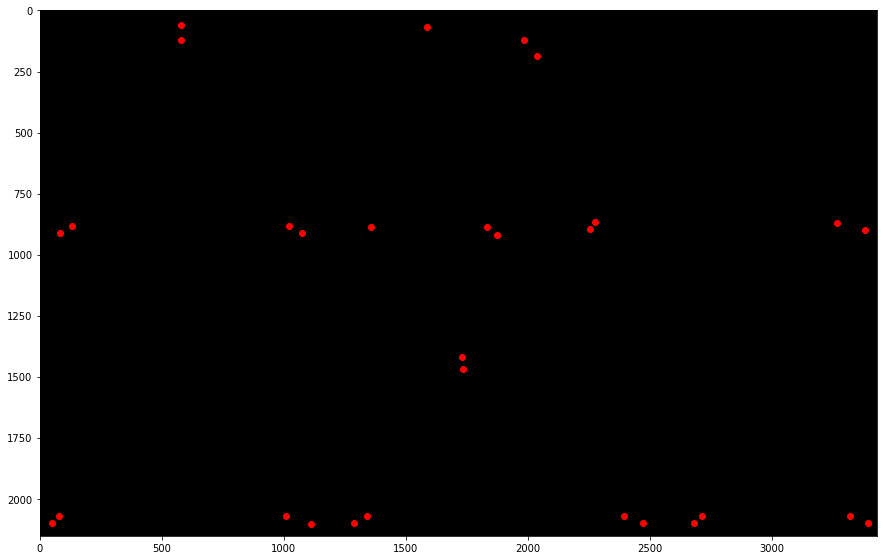

In [10]:
plt.figure(figsize=(15,15))
plt.imshow(corner_img)
plt.plot(xc, yc, 'o', color='red')
plt.show()